<a href="https://colab.research.google.com/github/uvsq22205250/SVM_Algorithm/blob/main/Rapport_Finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie théorique

## Support Vector Machine (SVM)

L'algorithme de machines à vecteurs de support (SVM) est une méthode d'apprentissage supervisé utilisée pour la classification et la régression. L'objectif de l'algorithme SVM est de trouver l'hyperplan qui maximise la marge entre les classes. La marge est la distance entre l'hyperplan de séparation et les points de données les plus proches de chaque classe.

Le SVM utilise une technique nommé 'Mapping to higher dimension'  (ou projection dans un espace de plus grande dimension) pour résoudre les problèmes de classification linéairement non-séparables dans un espace de dimension supérieure. La méthode consiste à appliquer une transformation non-linéaire aux données d'entrée (les caractéristiques), afin de les projeter dans un espace de dimension plus élevée où elles seront plus facilement séparables. Cette transformation peut être effectuée en utilisant différentes fonctions de noyau (kernel functions), telles que le noyau polynomial, le noyau gaussien (ou RBF), le noyau en chi2, le noyau de Laplace, etc.

En utilisant une fonction de noyau, la méthode du Mapping to Higher dimension permet de calculer le produit scalaire entre les données d'entrée projetées dans l'espace de grande dimension, sans avoir à effectuer explicitement la transformation. Cela permet d'économiser des ressources computationnelles et de rendre possible la résolution de problèmes de classification dans des espaces de dimension très élevée.

##Importation des packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Partie 1 - Breast cancer
La dataset "breast_cancer" est un jeu de données issu de la bibliothèque Scikit-learn de Python, contenant des informations sur des images numérisées de tissus mammaires bénins et malins. Les données incluent des mesures de 30 caractéristiques différentes, telles que la texture, la compacité et la symétrie du noyau de la cellule, ainsi que la moyenne, l'erreur standard et le pire résultat de chaque caractéristique pour chaque image. Le but de ce jeu de données est de prédire si un échantillon de tissu mammaire est bénin ou malin en se basant sur ces mesures.

##Description du dataset

1) Numéro d'identification 2) Diagnostic (M = malin, B = bénin) 3-32)

Dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire :

a) rayon (moyenne des distances du centre aux points du périmètre) b) texture (écart-type des valeurs d'échelle de gris) c) périmètre d) aire e) lissé (variation locale des longueurs de rayon) f) compacité (périmètre^2 / surface - 1.0) g) concavité (sévérité des parties concaves du contour) h) points concaves (nombre de parties concaves du contour) i) symétrie j) dimension fractale ("approximation de la ligne de côte" - 1)

La moyenne, l'erreur standard et la "pire" ou la plus grande (moyenne des trois plus grandes valeurs) de ces caractéristiques ont été calculées pour chaque image, ce qui a donné 30 caractéristiques. Par exemple, le champ 3 est le rayon moyen, le champ 13 est le rayon SE, le champ 23 est le pire rayon.

Toutes les valeurs des caractéristiques sont recodées avec quatre chiffres significatifs.

Valeurs d'attribut manquantes : aucune

Répartition des classes : 357 bénignes, 212 malignes

##Importation du dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

##Séparation des Features et les classes (Dependent and independent variables)

In [ ]:
##Features
X = data.data
##Classes
y = data.target

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

##Data Vizualization

### Conversion en DataFrame

In [ ]:
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


En regardant la première ligne de la discription **(count)** nous affirme qu'il n'y a aucun champs qui prend une valeur null. Donc, il n'y a pas besoin de faire un prétraitement pour remplir les champs null. 

### La matrice de corrélation

La matrice de corrélation est une matrice carrée qui montre les coefficients de corrélation de chaque paire de variables dans un jeu de données. Les coefficients de corrélation représentent la force et la direction de la relation linéaire entre deux variables.

https://www.zucisystems.com/be/blog/quest-ce-quune-matrice-de-correlation-comment-lutiliser-pour-prendre-des-decisions-commerciales/#:~:text=Une%20matrice%20de%20corr%C3%A9lation%20est,des%20d%C3%A9cisions%20commerciales%20en%20cons%C3%A9quence.

La matrice de corrélation est interprété suivant la valeur, on distingue 3 cas : 


1.   **Corrélation positive** : Quand la valeur > 0 mais moins de 1, est cela veut dire qu'une augmentation d'une variable engendre l'augmentation de l'autre.
2.   **Aucune corrélation** : Quand la valeur = 0, est cela indique que les deux variables sont totalement indépendant.
3.   **Corrélation négative** : Quand la valeur > -1 mais moins de 0. est cela indique que l'augmentation d'une variable engendre une diminution de l'ature variable.


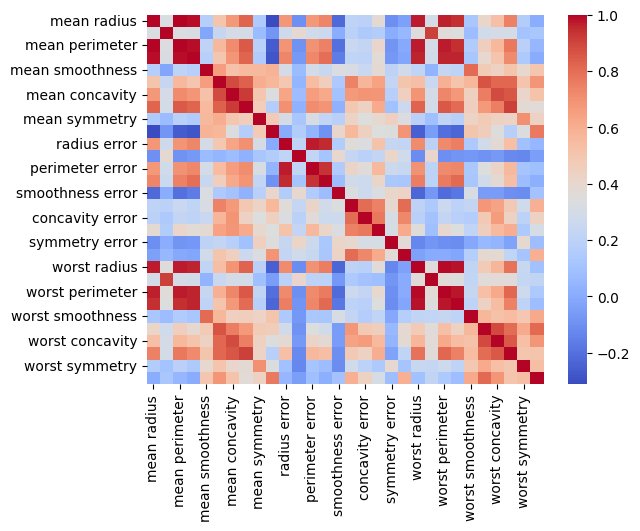

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = X.corr()

# Visualiser la matrice de corrélation sous forme de heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

### La distribution des classes

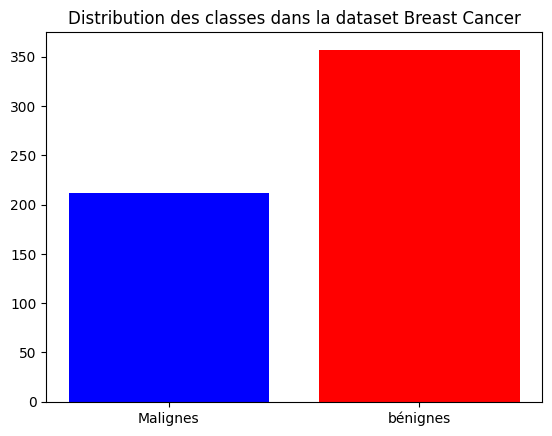

In [ ]:
# comptage des classes
unique, counts = np.unique(y, return_counts=True)

# visualisation de la distribution des classes
plt.bar(unique, counts, align='center', color=['b', 'r'])
plt.xticks(unique, ['Malignes','bénignes'])
plt.title('Distribution des classes dans la dataset Breast Cancer')
plt.show()

Les classes ne sont pas équi-distribuées.

### Analyse des histogrammes
L'analyse des histogrammes permet de visualiser la répartition de chaque variable dépendante 'Feature' selon les deux classes, et de déterminer s'il y a des différences significatives entre les deux distributions pour chaque variable.

Chaque histogramme montre la distribution de la variable explicative pour les deux classes de la variable cible (Malignant et Benign). Les barres rouges représentent la distribution pour la classe Malignant, et les barres bleues représentent la distribution pour la classe Benign, la densité de la distribution est représentée par la courbe lisse superposée sur l'histogramme.

Ces histogrammes permettent de visualiser la répartition de chaque caractéristique (variable independante) selon les deux classes. On peut ainsi observer s'il y a des différences significatives entre les deux distributions pour chaque caractéristique.

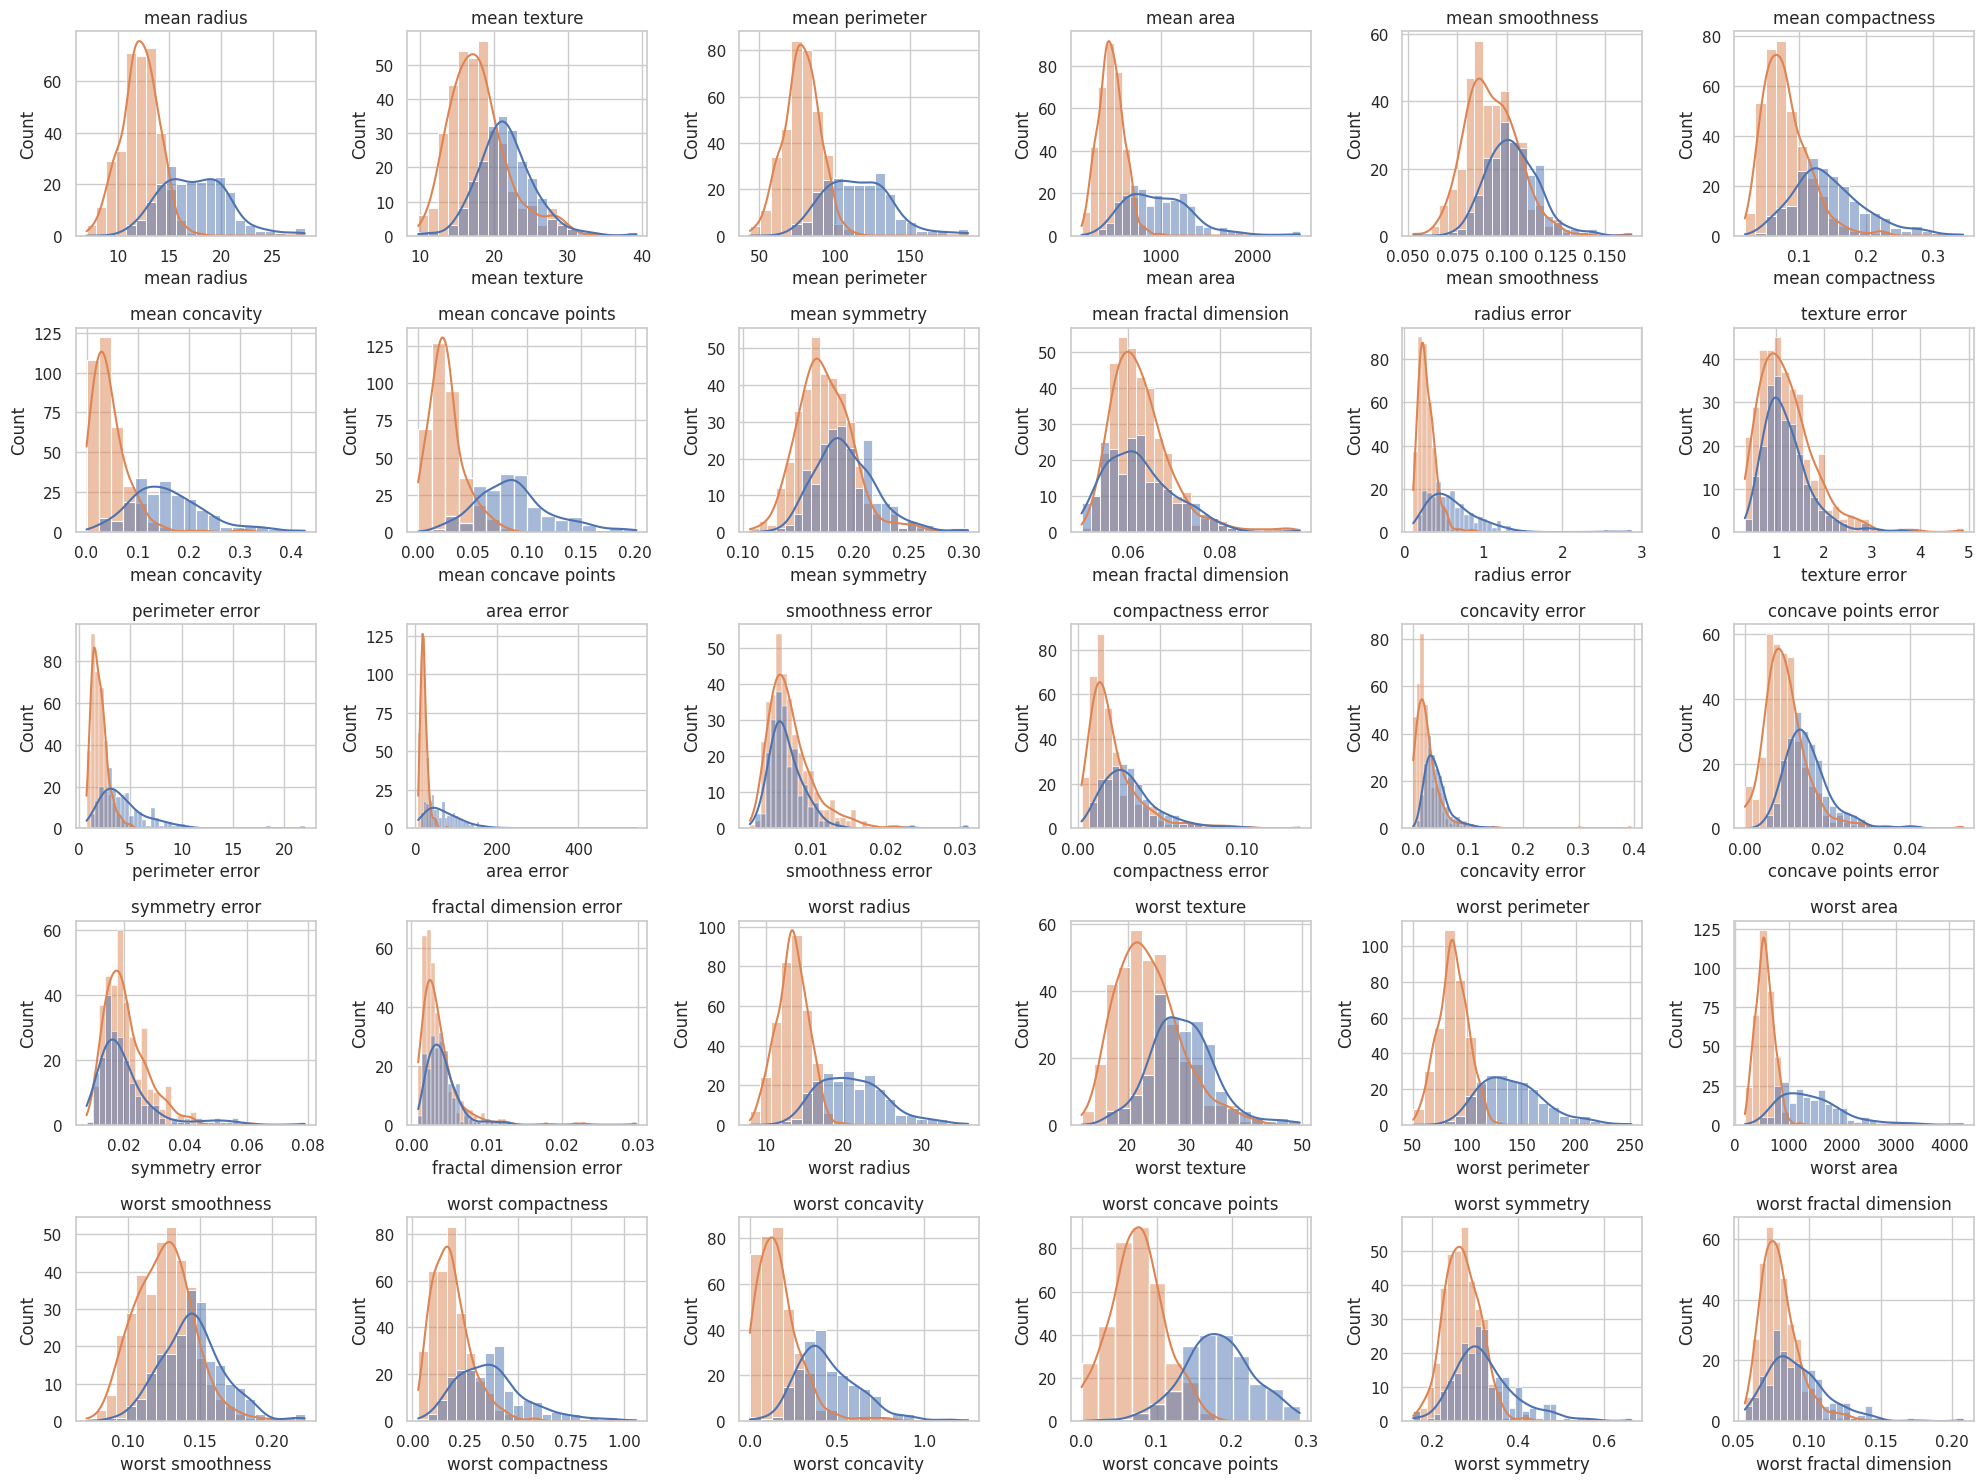

In [ ]:
# création d'un dataframe pandas pour les caractéristiques
import pandas as pd
df = df.drop('diagnosis', axis=1)

# histogrammes de la distribution des caractéristiques selon la classe
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
for ax, feature in zip(axes.flatten(), df.columns):
    sns.histplot(x=feature, data=df, hue=y, kde=True, ax=ax, legend=False)
    ax.set(title=feature)
plt.tight_layout()
plt.show()

### Principal Component Analysis (PCA)
Est une technique de visualisation qui permet de réduire les démensionnalités afin de projeter les données dans un espace de dimension inférieure tout en conservant autant d'information que possible. Cette technique est souvent utilisée pour visualiser des données à haute dimension en deux ou trois dimensions.

Dans notre cas, la classification, une visualisation en 2D est utile pour avoir une idée sur la séparabilité des classes, en projetant les données sur un esapce de deux dimensions. 

[Source] = https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

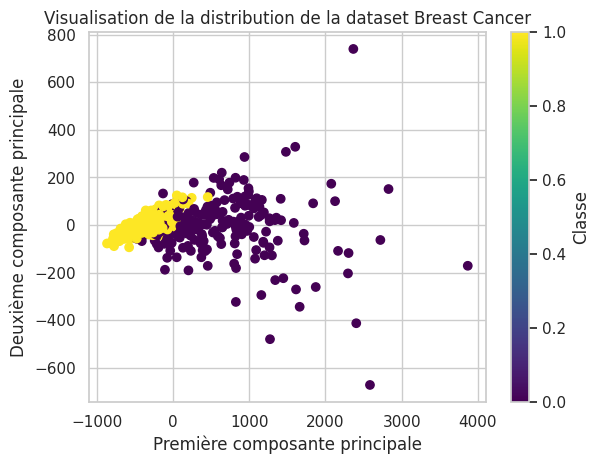

In [ ]:
from sklearn.decomposition import PCA


# réduction de dimension à 2 composantes principales pour visualisation
pca = PCA(n_components= 2)
X_reduced = pca.fit_transform(X)

# visualisation en scatterplot des deux premières composantes principales

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

plt.colorbar(label='Classe')
plt.title('Visualisation de la distribution de la dataset Breast Cancer')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()


## Data Preprocessing

### Splitting the dataset
Nous allons utiliser la fonction de la bibliothèque sklearn **traint_test_split**, elle prend en paramètre les données d'entrainement sous forme matricielle, et leurs classes sous forme vecteur. 

Cette fonction prend deux autres paramètres, train_size/ ou test_size (chacun complète l'autre à 100%) dans notre cas nous allons utiliser test_size qui représente la proportion de dataset destiné pour le test. 

Nous utilisons aussi la graine de ranom (seed) afin de controler le mélange des tuples qui va se générer (comme ça vous auriez la meme train dataset, test dataset que la notre).

[source] = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X = X.values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y = y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 1)

#### Mise à l'échelle
cette technique sert à rendre *les features*  dans la même échelle pour assurer qu'elle prennent des valeurs dans la meme echelle, afin d'empecher qu'une caractéristique (feature) domine par rapport aux autres et seront négliger par le modèle au moment de l'entrainement. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Pourquoi après le splitting en train/test et pas avant ?**

Pour la simple raison, c'est que l'ensemble de test est supposé, ou il est **censé** d'être un tout nouveau jeu de données sur lequelle on évaluera notre modèle. En revanche, le scaling calcule la moyenne et l'écart type des caractéristiques donc si on applique le scaling avant le split  on obtiendra une moyenne et un écart-type de tout l'ensemble de données (y compris le test qui est censé etre invisble par rapport au modèle). 


En gros, le but est d'empêcher la fuite d'information sur l'ensemble de test que le modèle n'est pas censé y connaitre avant la fin de l'entrainement.

## Model building

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)


Explication des hyperparamètres 


* C: Le paramètre de régularisation, qui contrôle la marge d'erreur de classification, il définit une pénalité associée à chaque observaiton d'entraînement mal classée. Une valeur plus élevée de C donne une marge séparatrice moins large  et le modèle tend à classer correctement un maximum de données d'entrainement ce qui peut générer un surapprentissage. Une valeur plus faible de C donne une marge plus large car le modèle accete plus facilement de mal classser certains observations ce qui donne une plus grande généralisation aux données de test.

* kernel: Le noyau utilisé pour transformer l'espace de caractéristiques. Les noyaux couramment utilisés sont 'linear', 'poly', 'rbf' (radial basis function) et 'sigmoid'. Le noyau linéaire est utilisé pour les données linéairement séparables, tandis que les noyaux non linéaires comme RBF sont utilisés pour les données non linéaires.

* degree: Le degré du noyau polynomial, utilisé pour le noyau polynomial.

* gamma: utilisé avec les kernel non linéaire. Il définit la forme de la frontière de décision, une valeur plus élevée de gamma donne une frontière plus complexe. Lorsque la valeur de ce paramètre est élevée, pour que les observations soient considérées dans le meme groupe (classe) elles doivent être très proches entre elles. Par contre, pour une valeur de gamma faible les observations sons réparties dans des groupes de façon linéaire.

* coef0: Terme indépendant dans la fonction de décision, utilisé pour les noyaux 'poly' et 'sigmoid'.

* shrinking: Booléen qui indique si le modèle doit utiliser la technique de réduction de la taille de la marge.

* probability: Booléen qui indique si le modèle doit être capable de prédire des probabilités de classe.

* tol: Tolérance de convergence pour l'algorithme d'optimisation.

* cache_size: Taille du cache en Mo.

* class_weight: Poids des classes en cas de déséquilibre des classes.

* verbose: Contrôle de la verbosité.

* max_iter: Nombre maximum d'itérations pour la convergence.

* decision_function_shape: 'ovo' pour une classification à plusieurs classes en utilisant une approche un-contre-un, ou 'ovr' pour une classification à plusieurs classes en utilisant une approche un-contre-tous.

* random_state: Seed utilisée par le générateur de nombres aléatoires pour la reproductibilité.


Les hyperparamètres les plus critiques pour SVM sont : kernel, C et gamma.

### Définition des méthodes

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
def svm_model_with_kernel(kernel):
  svm = SVC(kernel = kernel, random_state = 0)
  return svm

def svm_model_with_C(C):
  svm = SVC(C= C,kernel = 'rbf', verbose = True, random_state = 0)
  return svm 

def svm_model_with_degree(degree):
  svm = SVC(C= 0.558, kernel = 'poly', degree= degree, verbose = True, random_state = 0)
  return svm 

def svm_model_with_gamma(gamma):
  svm = SVC(kernel = 'rbf', gamma = gamma, verbose = False, random_state = 0)
  return svm 


### Etudes des kernels
Avant de faire des combinaisons efficaces entre les différents hyperparamètres, nous proposons de faire une études sur quelques noyeau utilisé par le SVM 

In [ ]:
accurcies = {}

####Linear kernel
Le Linear Kernel, est un noyeau utilisé dans le SVM pour séparer les données linéarement séparable en trouvant un hyperplan linéaire qui sépare les données en deux classes. Cependant, si les données ne sont pas linéairement séparables, le Linear Kernel peut ne pas être suffisant pour bien classer les données. Dans ce cas, on peut utiliser des fonctions de noyau plus complexes, telles que le RBF Kernel.

In [ ]:
svm_linear = svm_model_with_kernel('linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['linear'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['linear'])

Accuracy :  0.9649122807017544


#### RBF Kernel
Le rbf kernel (ou Radial Basis Function kernel) est un noyau utilisé dans l'algorithme SVM pour effectuer une classification non linéaire. Il est souvent utilisé comme alternative au noyau linéaire, qui ne peut pas traiter les données non linéaires.

Le rbf kernel fonctionne en transformant les données en un espace de fonctionnalités de dimensions supérieures, où les données peuvent être séparées linéairement. La transformation se fait en calculant la distance entre chaque point de données dans l'espace d'origine et en le projetant sur l'axe des z en utilisant une fonction gaussienne centrée sur ce point. La largeur de la gaussienne est déterminée par le paramètre gamma.

In [ ]:
rbf_svm = svm_model_with_kernel('rbf')

In [ ]:
rbf_svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = rbf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['rbf'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['rbf'])

Accuracy :  0.9736842105263158


#### Polynomiale kernel
Cela permet de transformer les données en utilisant une fonction polynomiale de degré spécifié en utilisant le hyperparameter degree, puis de les utiliser pour séparer les classes.

In [ ]:
poly_svm = svm_model_with_kernel('poly')
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['polynomial'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['polynomial'])

Accuracy :  0.8859649122807017


#### Sigmoid kernel
Le sigmoid kernel est un type de kernel utilisé dans les machines à vecteurs de support (SVM) pour effectuer une classification. Il est basé sur la fonction sigmoid, sa courbe est sous la forme d'un 'S' et il est courament utilisé pour la classification binaire.

In [ ]:
sigmoid_svm = svm_model_with_kernel('sigmoid')
sigmoid_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
y_pred = sigmoid_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['sigmoid'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['sigmoid'])

Accuracy :  0.9385964912280702


#### Analyse des résultats

In [ ]:
kernels_list = list(accurcies.keys())
accurcies_list = list(accurcies.values())

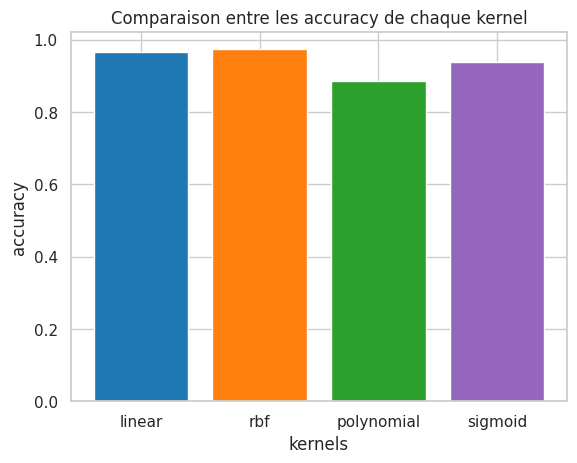

In [ ]:
# visualisation de la distribution des classes
plt.bar(kernels_list, accurcies_list, align='center', color= ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])
plt.xticks(kernels_list, kernels_list)
plt.xlabel('kernels')
plt.ylabel('accuracy')
plt.title('Comparaison entre les accuracy de chaque kernel')
plt.show()

### L'hyperparamètre C 
Cet hyperparamètre est utilisée pour régularisé le modèle SVM. Il contrôle la marge d'erreur autorisée dans la classification des points. Plus la valeur de C est grande, plus la marge sera petite et le modèle sera plus susceptible de sur-apprendre les données d'apprentissage, en revanche, si la valeur de C est petite le modèle il peut etre généralisable mais il risque de sous-apprendre les données d'apprentissage, dans cette section nous allons essayer de varier la valeur de cet hyperparamètre pour voir son effet. Pour cela, en fixe le kernel sur le rbf vu que précédement il a donné le meilleur résultat avec les valeurs par défauts des autres hyperparamètres.
A titre de compréhension d'un autre hyperparmètre, qui est **verbose**  on va mettre sa valeur à  True, ce dernier  indique si l'on souhaite activer ou non la sortie verbosité lors de l'entraînement du modèle SVM

In [ ]:
accurcies_c = []

In [ ]:
C = np.arange(0.001, 100.001, 0.001)

In [ ]:

for c in C :
  svm_C = svm_model_with_C(c)
  svm_C.fit(X_train, y_train)
  y_pred = svm_C.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_c.append(accuracy)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print(C[accurcies_c.index(max(accurcies_c))])

0.558


In [ ]:
accurcies_c.index(max(accurcies_c))

557

In [ ]:
accurcies_c[557]

0.9736842105263158

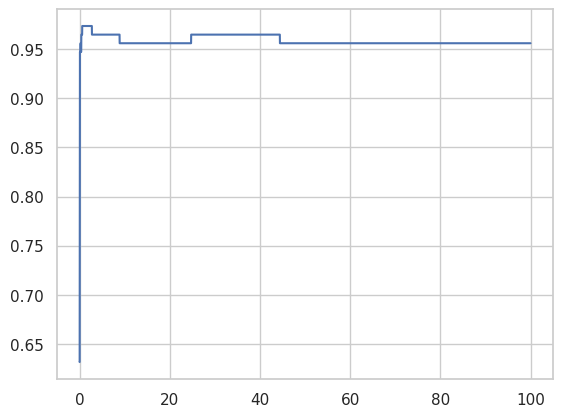

In [ ]:
plt.plot(C, accurcies_c)

On remarque que lorsque le C prend des valeurs très petites, l'accuracy prend des valeurs petites, en augmentant la valeur du C, l'accuracy augmente, jusqu'à qu'elle prenne une valeur maximale à la valeur **C = 0.558** 

### L'hyperparamètre degree
Cet hyperparamètre est utilisé pour controler la puissance du kernel polynomial, donc, ce hyperparmètre est pris en considération qu'avec le kernel polynomial et est ignoré avec les autres kernels. Un noyau polynomial de degré '**d**' transforme l'espace de données d'entrée en un nouvel espace de données dont les points sont linéairement séparables à l'aide d'un hyperplan. Ce nouvel espace a une dimensionnalité plus élevée que l'espace de données d'entrée. Le degré '**d**' détermine la dimensionnalité de l'espace de données de sortie.


Plus le degré est élevé, plus la dimension de l'espace de données de sortie est grande et plus la frontière de décision de l'algorithme SVM est flexible.


In [ ]:
accurcies_d = []

In [ ]:
## on commence à partir du degré 2 car degree =1 revient à un kernel linéaire.
## de degré 2 jusqu'à degré 10 inclu

degrees = np.arange(2, 31, 1)
for degree in degrees :
  svm_degree = svm_model_with_degree(degree)
  svm_degree.fit(X_train, y_train)
  y_pred = svm_degree.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_d.append(accuracy)

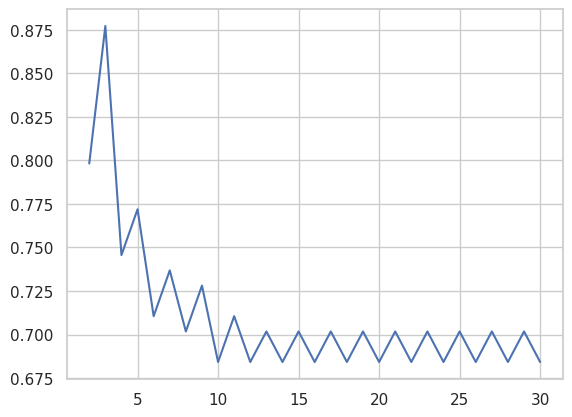

In [ ]:
plt.plot(degrees, accurcies_d)

Ce qu'on peut déduire de ce graphe c'est qu'une augmentation excessive de la valeur de degree peut conduire à un surajustement et à une baisse de la généralisation de l'algorithme ce qui démontre la dimunition de l'accurcay

### L'hyperparamètre Gamma
L'hyperparamètre gamma contrôle la forme de la frontière de décision du modèle. Il s'agit d'un coefficient qui controle l'influence de chaque point de données d'apprentissage sur la frontière de décision, plus la valeur gamma est grande, plus l'influence de chaque point d'entraînement est grande et cela signifie que les points de données les plus proches ont un poids plus important pour la définition de l'hyperplan de décision.
en Scikit-learn, cet hyperparamètre peut prendre l'une des 3 valeurs suivante: 

**scale** : c'est la valeur par défaut, dans ce cas là, gamma est automatiquement mise à l'échelle en fonction de l'inverse de la taille de l'ensemble de données d'entraînement.

**auto** : la valeur de gamma est mise à jour automatiquement en fonction du nombre de fonctionnalités dans les données d'entrée.

**float**: un float non-négative, plus la valeur de gamma est petite, plus la décision de la frontière est douce.

Dans cette section nous allons voir l'effet de chaque valeur sur l'accuracy.

In [ ]:
svm_gamma = svm_model_with_gamma('scale')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [ ]:
svm_gamma = svm_model_with_gamma('auto')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

In [ ]:
accurcies_g = []

In [ ]:
gammas = np.arange(0.0001, 10.0001, 0.0001)

In [ ]:

for gamma in gammas :
  svm_gamma = svm_model_with_gamma(gamma)
  svm_gamma.fit(X_train, y_train)
  y_pred = svm_gamma.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_g.append(accuracy)

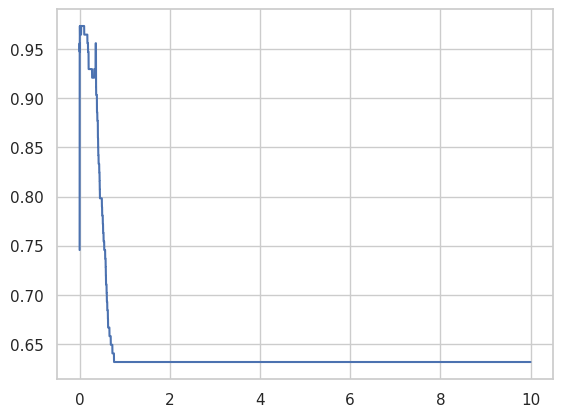

In [ ]:
plt.plot(gammas, accurcies_g)

Notez que pour les noyaux RBF, la valeur gamma est la valeur qui définit la distance à laquelle les points voisins sont considérés comme ayant une influence significative sur la frontière de décision. Des valeurs gamma élevées peuvent entraîner un surajustement du modèle aux données d'entraînement, tandis que des valeurs gamma faibles peuvent entraîner un sous-ajustement du modèle.

### La relation entre C et GAMMA

##### Explication de Gamma

Gamma est un hyperparamètre utilisé avec les SVM non linéaires. L'un des noyaux non linéaires les plus couramment utilisés est la fonction de base radiale (RBF). Le paramètre gamma de RBF contrôle la distance d'influence d'un seul point d'entraînement.
De faibles valeurs de gamma indiquent un grand rayon de similarité, ce qui entraîne le regroupement de plus de points. Pour des valeurs élevées de gamma, les points doivent être très proches les uns des autres pour être considérés dans le même groupe (ou classe). Par conséquent, les modèles avec de très grandes valeurs gamma ont tendance à sur-ajuster.
Dans la section suivante nous allons tester les parametres Gamma et c sur differents noyaux (non-lineaire)

In [ ]:
Gammas=np.arange(0.01,1,0.001).tolist()
Cs = [0.1,10,20,100]
len(Gammas)

990

In [ ]:
def relation_between_C_G(kernel):
  scores=[]
  for i in Cs:
    for j in Gammas:
      svm_rbf = SVC(C=i,kernel=kernel,gamma=j)
      svm_rbf.fit(X_train, y_train)
      y_pred = svm_rbf.predict(X_test)
      scores.append(accuracy_score(y_test, y_pred))
  scores = np.array(scores).reshape(len(Cs), len(Gammas))
  return scores


#### Dessiner le graphe en variant gamma et fixant l'hyperparametre C : RBF

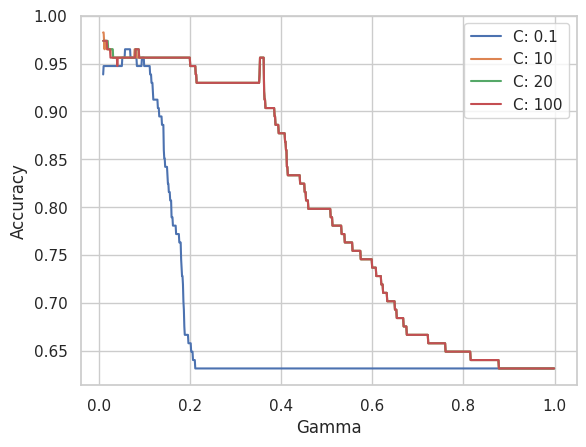

In [ ]:
scores = relation_between_C_G("rbf")
for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()

#### Dessiner le graphe en variant gamma et fixant l'hyperparametre C : Sigmoid

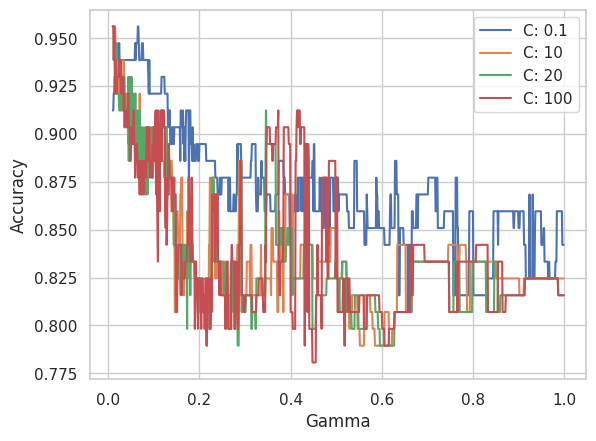

In [ ]:
scores = relation_between_C_G("sigmoid")
for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()

#### Dessiner le graphe en variant gamma et fixant l'hyperparametre C : POLY

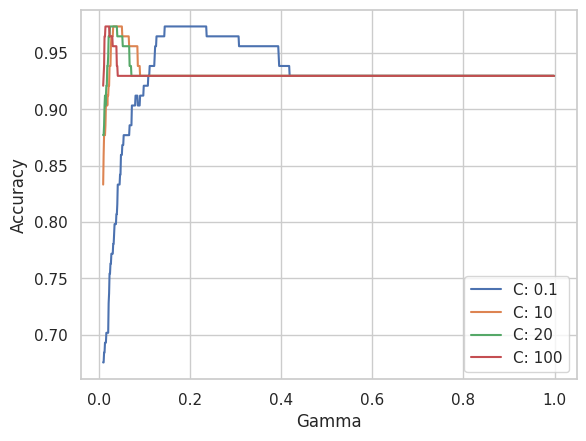

In [ ]:
scores = relation_between_C_G("poly")
for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()

#### Conclusion

Pour un noyau linéaire, il suffit d'optimiser le paramètre c. Cependant, si nous voulons utiliser un noyau RBF, les paramètres c et gamma doivent être optimisés simultanément. Si gamma est grand, l'effet de c devient négligeable. Si gamma est petit, c affecte le modèle comme il affecte un modèle linéaire.

### Grid Search
Nous avons remarqué que pour ce dataset, le kernel rbf a donné les meilleurs résultats. Cependant, afin de trouver la meilleure combinaison de C et Gamma nous allons opter pour la méthode de GridSearch. Ce qu'il va faire GridSearch, c'est qu'il va prendre un intervalle de valeurs de C et gamma et essaie les différentes combinaison possible pour trouver le modèle avec les meilleurs hyperparameters. Dans l'étape prochaine nous allons illustrer les métrics d'évaluations sur cette meilleure combinaison.

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
alg_svm= SVC()  
params = {'kernel': ['rbf'], 
         'gamma': [0.0001,0.001,0.005,0.01,1,10], 
         'C':[0.1,0.558,1,5,10,50,100]} 

In [ ]:
hyper_params_grid = GridSearchCV(alg_svm, params, cv=2, scoring  
='accuracy', n_jobs=-1) 

In [ ]:
hyper_params_models = hyper_params_grid.fit(X_train, y_train) 

In [ ]:
hyper_params_models.best_params_  

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
model = hyper_params_models.best_estimator_ 

### les metrics d'evaluation

**Matrice de confusion** : c'est une matrice qui représente le nombre des précisions correctes et inccorectes pour chaque class.

**l'accuracy** : Reprèsente la mesure de la capacité du modèle de prédire toutes les classes correctement, c'est le nombre de prédiction correctes divisés par le nombre total de prédictions effectués ( nombre de prédiction correct / len(y_test) ) 

**Precision** : permet de mesurer la capacité d'un algorithme à refuser les solutions non pertinentes, cela signifie que qu'elle mesure la capacité du modèle à ne pas classer les échantillons négatifs en tant que positifis. Elle est calculée comme le rapport des vrais positifs (TP) sur la somme des vrais positifs et des faux positifs (FP) : TP / (TP + FP).

**Rappel** : Mesure la capacité d'un algorithme à fournir les solutions pertinentes, c'est à dire, qu'il mesure la capacité du modèle à identifier les tous les échantillons positifs. Elle est calculée comme le rapport des vrais positifs (TP) sur la somme des vrais positifs et des faux positifs (FP) : TP / (TP + FP).

**F1 score** : C'est la moyenne harmonique de la précision et du rappel. Elle est utilisée pour combiner la précision et le rappel en une seule métrique. Elle est calculée comme 2 * ((précision * rappel) / (précision + rappel)).


In [ ]:
y_pred = model.predict(X_test) 

[[39  3]
 [ 0 72]]


<ipython-input-24-b9719a46058c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-24-b9719a46058c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


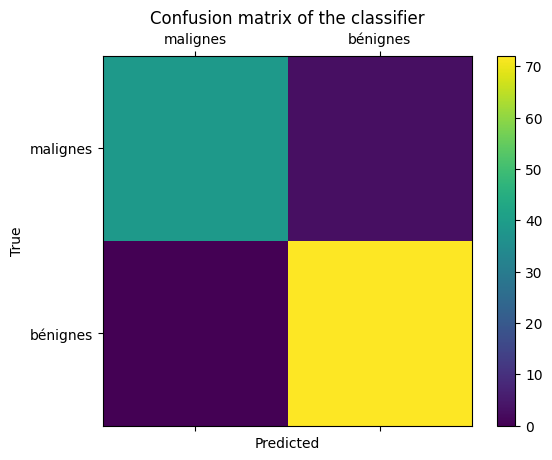

In [ ]:
labels = ['malignes', 'bénignes']
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_pred
import collections, numpy
counter = collections.Counter(y_pred)
counter

Counter({1: 75, 0: 39})

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
svm_metric = SVC(kernel='rbf',C=0.558,gamma=0.02, random_state=0)
svm_metric.fit(X_train, y_train)
y_pred = svm_metric.predict(X_test)
# Évaluation de la performance
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9736842105263158


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.96
Recall: 1.0
F1 score: 0.9795918367346939


## Cross validation

**Partie ajoutée après le retour du Prof** 
[source] = https://scikit-learn.org/stable/modules/cross_validation.html 

[source] = https://stackoverflow.com/questions/58939568/standardize-data-with-k-fold-cross-validation


Rechargeons la data ! 

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X =data.data.values
y = data.target.values

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

On va utiliser la meilleure combinaison obtenue par GridSearch 

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score

In [ ]:
def calcul_metrics(model, y_test):
    y_pred = model.predict(y_test)
    return accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
    recall_score(y_test, y_pred), f1_score(y_test, y_pred)




In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = ['accuracy','precision', 'recall','f1']


In [ ]:
from sklearn.model_selection import cross_validate
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', C=100, gamma = 0.01 ))
scores = cross_validate(clf, X, y, cv=5, scoring=scoring)

In [ ]:
scores

{'fit_time': array([0.00623488, 0.00515103, 0.0054481 , 0.00501895, 0.00559592]),
 'score_time': array([0.00555062, 0.00533104, 0.00530362, 0.0052774 , 0.00507021]),
 'test_accuracy': array([0.96491228, 0.95614035, 0.96491228, 0.98245614, 0.97345133]),
 'test_precision': array([0.98550725, 0.95833333, 0.95945946, 0.97297297, 1.        ]),
 'test_recall': array([0.95774648, 0.97183099, 0.98611111, 1.        , 0.95774648]),
 'test_f1': array([0.97142857, 0.96503497, 0.97260274, 0.98630137, 0.97841727])}

In [ ]:
print(f"L'accuracy moyenne : {np.mean(scores['test_accuracy'])}")
print(f"La precision moyenne : {np.mean(scores['test_precision'])}")
print(f"Le rappel moyen : {np.mean(scores['test_recall'])}")
print(f"Le f1 score moyen : {np.mean(scores['test_f1'])}")

L'accuracy moyenne : 0.9683744760130415
La precision moyenne : 0.9752546024285154
Le rappel moyen : 0.9746870109546165
Le f1 score moyen : 0.9747569824479255


# Partie 2 - Adult income

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importation et prétraitement de dataset
le jeu de données Adult Income Dataset, également connu sous le nom de "Census Income" Dataset,
 est un ensemble de données de classification binaire largement utilisé dans l'apprentissage automatique et l'analyse de données.

Ce dataset contient des données démographiques et des informations financières sur les personnes résidant aux États-Unis en 1994.
 Les caractéristiques des individus incluent leur âge, leur éducation, leur profession, leur état civil, leur sexe, leur origine ethnique, leur nationalité, leur situation familiale et leur revenu. Le revenu est étiqueté comme étant soit "<=50K" (revenu annuel inférieur ou égal à 50 000 \$) soit ">50K" (revenu annuel supérieur à 50 000 \$).

Le jeu de données contient un total de 48 842 entrées, dont 32 561 ont un revenu inférieur ou égal à 50 000 \$ et 16 281 ont un revenu supérieur à 50 000 \$. 
Il est souvent utilisé pour entraîner et tester des modèles de classification binaire afin de prédire si une personne a un revenu annuel supérieur ou inférieur à 50 000 \$.

Le jeu de données Adult Income Dataset est un ensemble de données public largement utilisé et accessible en ligne.
Le jeu de données Adult Income Dataset contient les caractéristiques suivantes pour chaque individu :

- age: l'âge de la personne en années.

- workclass: le type d'employeur de la personne. Les catégories possibles sont "Private" (entreprise privée),
 "Self-emp-not-inc" (travailleur indépendant non incorporé), "Self-emp-inc" (travailleur indépendant incorporé), 
"Federal-gov" (gouvernement fédéral), "Local-gov" (gouvernement local), "State-gov" (gouvernement d'État), "Without-pay" (sans salaire) et "Never-worked" (jamais travaillé).

- education: le niveau d'éducation de la personne. Les catégories possibles vont de "Preschool" (préscolaire) à "Doctorate" (doctorat).

- education-num: le nombre d'années d'éducation de la personne.

- marital-status: l'état matrimonial de la personne. Les catégories possibles sont "Married-civ-spouse" (marié ou conjoint de fait), "Divorced" (divorcé), "Never-married" (jamais marié), "Separated" (séparé), "Widowed" (veuf/veuve), "Married-spouse-absent" (marié mais conjoint absent) et "Married-AF-spouse" (marié à un conjoint militaire).

- occupation: la profession de la personne. Les catégories possibles incluent des professions telles que "Exec-managerial" (cadre), "Prof-specialty" (spécialiste), "Craft-repair" (artisan), "Sales" (vendeur), "Adm-clerical" (administratif), "Farming-fishing" (agriculture-pêche), "Tech-support" (technique de soutien), "Protective-serv" (services de sécurité) et "Other-service" (autres services).

- relationship: la relation de la personne avec sa famille. Les catégories possibles sont "Wife" (épouse), "Own-child" (enfant), "Husband" (époux), "Not-in-family" (non membre de la famille), "Other-relative" (autre parent) et "Unmarried" (non marié).

- race: la race de la personne. Les catégories possibles incluent "White" (blanc), "Black" (noir), "Asian-Pac-Islander" (asiatique-pacifique-insulaire), "Amer-Indian-Eskimo" (amérindien-esquimau) et "Other" (autre).

- sex: le sexe de la personne.

- capital-gain: le montant du gain en capital de la personne.

- capital-loss: le montant de la perte en capital de la personne.

- hours-per-week: le nombre d'heures de travail par semaine de la personne.

- native-country: le pays d'origine de la personne. Les catégories possibles incluent les pays tels que "United-States" (États-Unis), "Mexico" (Mexique), "Philippines" (Philippines), "Germany" (Allemagne) et "Puerto-Rico" (Porto Rico), ainsi qu'une catégorie "Other" (autre) pour les pays avec moins de représent


##Importation des données
L'ensemble de données de Adult est deja divisé en 2 sous ensemble, pour l'entrainement et pour le test. Ce que nous allons faire, c'est que nous allons ramener les deux et les concaténer afin de constituer un jeu de données de 48842 enregistrements et nous faisons le split comme on veut après.

In [ ]:
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train = pd.read_csv(url_train, delimiter=", ", header=None, index_col=False,
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country', 'income'])
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
test = pd.read_csv(url_test, delimiter=", ", header=None, index_col=False,skiprows=1,
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country', 'income'])

data = train.append(test)

<ipython-input-3-0a1a0bfd50f6>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(url_train, delimiter=", ", header=None, index_col=False,
<ipython-input-3-0a1a0bfd50f6>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(url_test, delimiter=", ", header=None, index_col=False,skiprows=1,
<ipython-input-3-0a1a0bfd50f6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### A propos du dataset

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## Prétraitement des données

**Remarque** 
Après avoir executé : data.info() nous remarquons que Non-Null = le nombre d'enregistrements (tuples) de cette dataset, or que, il est bien noté sur le site officielle dans lequelle on a trouvé cette dataset qu'il y des données manquantes (missing data). Enquettons !! 

In [ ]:
data.iloc[[14]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


le 15 energistremment, dans l'attribut native-country on voit que la valeur est **"?"**. c'est la valeur null de cette dataset. Du coup, nous devons remplacer tous les **"?"** par des valeurs **"nan"** pour qu'on puisse avancer dans notre processus de prétraitement.
en utilisant la performance de selection effiace des *row* de **Pandas** et numpy.nan, nous pourrons remplacer facilement ces données manquantes.

In [ ]:
data[data== '?']= np.nan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Nous constatons que les colonnes : workclass, occupation et native-contry contiennent des valeurs null. En plus, nous remarquons les types de données de notre dataset: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week sont de type numérique et les autres sont de type objet.

### Remplissage des champs null

Maintenant, c'est le moment de s'occuper avec les valeurs manquantes, nous rappelons que nous avons les détécter par des valeur **"?"**  et nous les avons transformé en valeurs **nan** pour qu'on puisse les traiter.

Y'en a plusieurs strategies pour traiter ce genre de situation des valeurs null: 


1.   **Suppression des lignes contenant les valeurs null** : Supprimer ces ligne, cependant cette stratégie n'est pas trop admirable surtout si le nombre de ces tuples est considérable par rapport à la taille de dataset et ça peut entraîner une perte d'informations importantes si les valeurs manquantes sont réparties dans plusieurs colonnes ou lignes. 
2.   **Remplir par des statistiques** : Remplaces les valeurs null par des statistiques telles que la moyenne, la médiane ou par la valeur la plus fréquente (mode) "généralement pour les attributs de type numérique on opte par la stratégie de la moyenne mais tout depend". cette stratégie est simple et rapide à mettre en oeuvre mais elle peut générer un bruit sur la dataset que nous voyons un épée à double tranchant pour éviter le surapprentissage.



Vu que les colonnes qui contiennent des valeurs manquantes sont de type **object**, nous utilsons la startegie **Remplir par des statistiques** et on remplit par les valeurs les plus fréquentes.
Scikit-learn dispose des fonctionnalités qui permettent de remplir facilement ces valeurs null dans le module **sklearn.impute** la classe **SimpleImputer**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

on utilise le ColumnTransformer pour appliquer le remplissage directement en correspdance des colonnes.

In [ ]:
workclass_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
occupation_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
native_country_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('workclass_imputer', workclass_imputer, ['workclass']),
        ('occupation_imputer', occupation_imputer, ['occupation']),
        ('native_country_imputer', native_country_imputer, ['native-country'])

    ])

In [ ]:
data[['workclass', 'occupation', 'native-country']]= ct.fit_transform(data)

#### Resultat : 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Par rapport au 15eme enregistrement de tout à l'heure, native-country est maintenant rempli par la valeur united-states.

In [ ]:
data.iloc[[14]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K


### Distribtution des données

In [ ]:
data['income'].replace(['>50K.'],'>50K', inplace = True)
data['income'].replace(['<=50K.'],'<=50K', inplace = True)

<Axes: title={'center': 'Distribution des salaires des adultes'}>

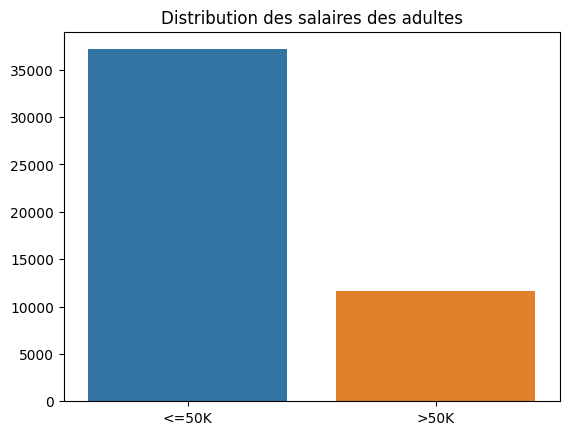

In [ ]:
unique, counts = np.unique(data[['income']], return_counts=True)
plt.title('Distribution des salaires des adultes')
sns.barplot(x=unique, y=counts)

On remarque que les classes sont désiquilibrées, cela va impacter le modèle que nous allons créer par la suite. En effet le nombre d'enregistrement pour la classe **<=50K** est 3 fois double le nombre d'enregistrement pour la classe **>50K**, du coup notre modèle sera entrainé beaucoup plus sur la classe dominante, une solution à proposer, est de faire **une augmentation de données** par une technique nommé **Random Oversampling** (Rééchantillonnage) qui sert à équilibrer les classes dans un ensmble de données désiquilibré (comme notre cas) par une séléction aléatoire des exemples de la classe minoritaire.

*source* : [Random Oversampling](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

Avant d'augmenter les données, nous verrons la corrélation entre les caractérisitques de la dataset.(La table de corrélation inclut seulement les caractéristiques de type numériques)

<ipython-input-13-b715bbf2f39d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: title={'center': 'La correlation entre les caractéristiques'}>

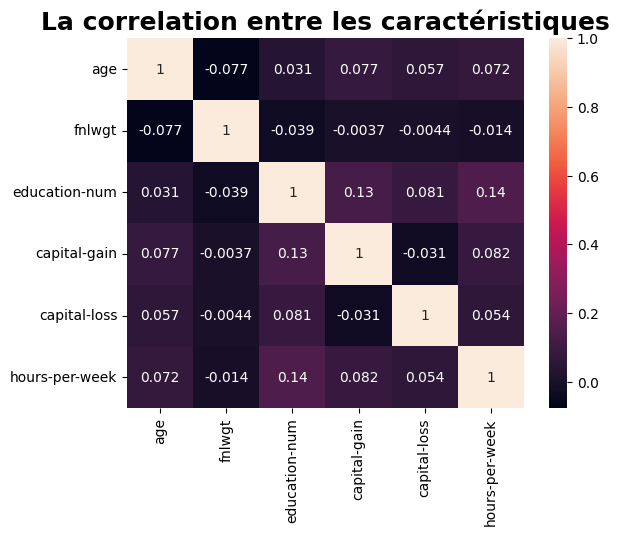

In [ ]:
plt.title("La correlation entre les caractéristiques", fontsize = 18, fontweight = 'bold')
sns.heatmap(data.corr(), annot = True)

Nous remarquons que la majorité des caractéristiques sont indépendants (corrélation négative) ou tend vers 0.

### Fusion des catégories
**Justification de ce choix**




In [ ]:
data['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

pour la caractéristique *workclass*,  les catégories **without-pay** et **Never-worked** peut refère à la meme chose, surtout que les deux catégories représentent une minorité par rapport aux autres catégories, du coup on peut les fusionner ensemble en remplassant par exemple Without-pay par Never-worked.

In [ ]:
data['workclass'].replace('Without-pay', 'Never-worked', inplace=True)

In [ ]:
data['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Never-worked           31
Name: workclass, dtype: int64

Pour la caractéristique education, nous remarquons que qu'on a beaucoup de catégories aussi qui peuvent réfère à la meme chose, et qui n'importe aucune information supplémentaire, nous proposons de remplacer les catégories : **11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'** par une catégorie plus généraliste nommons la **school**.

In [ ]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'School', inplace = True)

In [ ]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
School           6408
Masters          2657
Assoc-voc        2061
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Name: education, dtype: int64

In [ ]:
data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [ ]:
data['race'].replace(['Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

Remarquons maintenant pour la caractéristique : **marital-status**, nous avons 7 catégories : 

In [ ]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Cependant, Maried-spouse-absent, Married-AF-spouse, Married-civ-spouse, nous pourrons les rassembles tous dans une seule catégorie Married qui donne l'information que cette personne est marié(e).

In [ ]:
mapping = {'Divorced': 'Divorced', 'Separated': 'Divorced',
           'Married-AF-spouse': 'Married', 'Married-civ-spouse': 'Married', 
           'Married-spouse-absent': 'Married', 'Never-married': 'Single', 
           'Widowed': 'Widowed'}
data['marital-status'] = data['marital-status'].replace(mapping)

In [ ]:
data['marital-status'].value_counts()

Married     23044
Single      16117
Divorced     8163
Widowed      1518
Name: marital-status, dtype: int64

### Augmentation des données

In [ ]:
class_counts = data['income'].value_counts()
print(class_counts)

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [ ]:
# Oversampling la classe minoritaire : '>50K'
class_0_count, class_1_count = data['income'].value_counts()
class_1 = data[data['income'] == '>50K']
class_1_oversampled = class_1.sample(class_0_count, replace=True)

# Concatenatenation de la classe rééchantillée :  '>50K' et la classe dominante'<=50K' afin d'obtenir la dataset balanced. 
data_balanced = pd.concat([data[data['income'] == '<=50K'], class_1_oversampled], axis=0)

# Vérification
class_counts = data_balanced['income'].value_counts()
print(class_counts)

<=50K    37155
>50K     37155
Name: income, dtype: int64


<Axes: title={'center': "Distribution des salaires des adultes après l'augmentation des données"}>

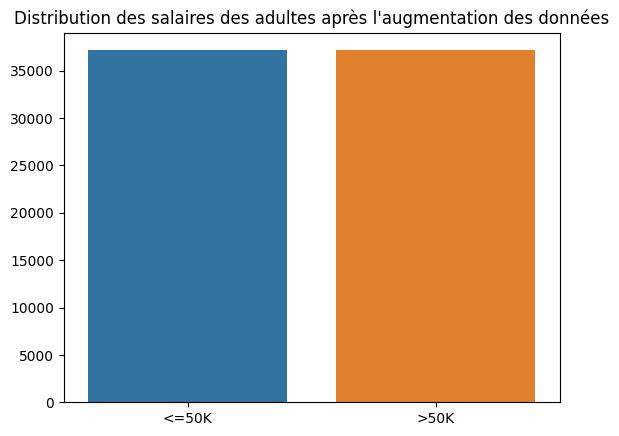

In [ ]:
unique, counts = np.unique(data_balanced[['income']], return_counts=True)
plt.title("Distribution des salaires des adultes après l'augmentation des données")
sns.barplot(x=unique, y=counts)

### Encodage des valeurs nominales
**L'encodage** est une technique de conversion des données non numériques qui sont incompréhensible par le modèle en une forme numérique ou binaire. Les données catégorielles peuvent etre divisé en deux catégories **Nominal** (il n'y a pas d'une ordre entre les catégories) , **Ordinal** il y a un ordre logique entre les données. Exemples :    


*   **Ordinal** : petit, moyen, grand.
*   **Nominal** : Rouge, Vert, Bleu .

il existe différents méthodes pour encoder ces données catégorielles en données numériques puis les utiliser pour les algorithmes de Machine Learning, parmi lesquelles nous trouvons :      


*   **OneHot Encoding** : chaque catégorie d'une variable catégorielle est représentée par une colonne binaire distincte dans une matrice. Chaque ligne de la matrice représente un exemple, et une seule colonne aura une valeur de 1, indiquant la catégorie à laquelle appartient l'exemple. par exemple ['red', 'blue', 'gree'] on les représente [1, 0, 0] pour red, [0, 1, 0] pour le blue, [0, 0, 1] pour le vert, ou comme notre cas ['male', 'female']= [[1,0], [0,1]]. Ce type d'encodage est utilisé généralement quand il y'a pas un ordre logique entre les données c'est à dire pour les données nominales. 
*   **Label Encoding** : chaque catégorie d'une variabale catégorielle est représenté par une valeur numérique unique par exemple : ['red', 'blue', 'gree'] = [1, 2, 0]. Ce type d'encodage est utilisé soit l'ordre est important ou pas.
*    **Ordainal encoding** : ici, l'ordre est important, les valeurs de ce type de catégorie est représenté par une valeur numérique, par exemple : ['Bad', 'Good', 'Excellent'] = [0, 1, 2]

Dans notre dataset, les données des caractérisitiques (independent variables) catégorielles n'ont aucun ordre logique entre eux par exemple 'Marital-status' =  {'Married', 'Single', 'Divorced', 'Widowed'}, du coup on opte pour l'encodage **OneHot**. En revanche, pour les classes (dependent vairables) l'attribut 'income', on constate qu'il y a un ordre logique >50K , <=50K donc on encode cette colonne en utilisant le Ordinal encoding. 




On sépare les caractéristiques (features, independent variables) de la target (dependent variables).puis nous faisons le prétraitement nécessaire pour diviser l'ensmble de donées en 2 ensembles, un pour l'entrainement et un pour le test, et puis l'encodage.

In [ ]:
y = data_balanced.iloc [:, -1].values
# y_test = test.iloc [:, -1].values
data_balanced.drop(['income'], axis = 1, inplace = True)
# test.drop(['income'], axis = 1, inplace = True)

In [ ]:
y.shape

(74310,)

In [ ]:
X = data_balanced.iloc[:,:].values

In [ ]:
X.shape

(74310, 14)

On divise notre dataset, en deux sous ensmble, pour l'entrainement et pour le test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 565)

In [ ]:
X_train.shape

(59448, 14)

In [ ]:
X_test.shape

(14862, 14)

On applique le OneHot Encoding 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# spécification des colonnes catégorielles à encoder
categorical = [1,3,5,6,7,8,9,13]

# définition du ColumnTransformer
ct = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)], remainder='passthrough')

# application du ColumnTransformer sur les données
data_transformed = ct.fit_transform(X_train)

In [ ]:
data_transformed

array([[0.0, 0.0, 0.0, ..., 0, 0, 45],
       [0.0, 0.0, 0.0, ..., 0, 0, 35],
       [0.0, 0.0, 0.0, ..., 0, 0, 42],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       [1.0, 0.0, 0.0, ..., 0, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 40]], dtype=object)

In [ ]:
X_train = data_transformed
X_test = ct.transform(X_test)
X_test

array([[0.0, 1.0, 0.0, ..., 0, 0, 35],
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 36],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 1977, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 70],
       [0.0, 0.0, 0.0, ..., 0, 0, 45]], dtype=object)

In [ ]:
X_train[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34, 366198, 16, 0, 0,
       45], dtype=object)

On applique le label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train =  le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
X_test[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 40, 261497, 9, 0, 0,
       35], dtype=object)

Dans la partie 1 du TER, nous avons appliqué ce qu'on appelle la mise à l'échelle (feature scaling) sans entrer dans les détails. La mise à l'échele est une étape importante du prétraitement des données qui consiste à transformer les données à une échelle commune.
Il existe plusieurs méthodes pour effectuer la mise à l'échelle des caractéristiques, mais les deux principales sont la mise à l'échelle standard ("standard scaling" en anglais) qui consiste à soustraire la moyenne de chaque caractérisitqueet à diviser par l'écart-type, les valeurs varient entre -3 et +3. D'autre part, la mise à l'échelle normale ("normal scaling" en anglais) consiste à diviser chaque caractéristique par sa plage (la différence entre la valeur maximale et la valeur minimale). Cela a pour effet de mettre les données à une échelle commune et de les faire varier entre 0 et 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Création du modèle

### Kernels

In [ ]:
accurcies = {}

#### Linear kernel

In [ ]:
svm_linear = svm_model_with_kernel('linear')

In [ ]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['linear'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['linear'])

Accuracy :  0.8053424841878617


#### rbf kernel

In [ ]:
rbf_svm = svm_model_with_kernel('rbf')
rbf_svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = rbf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['rbf'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['rbf'])

Accuracy :  0.8255954784012919


#### Polynomial kernel

In [ ]:
poly_svm = svm_model_with_kernel('poly')
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['polynomial'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['polynomial'])

Accuracy :  0.8153680527519849


#### Sigmoid Kernel

In [ ]:
sigmoid_svm = svm_model_with_kernel('sigmoid')
sigmoid_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
y_pred = poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['sigmoid'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['sigmoid'])

Accuracy :  0.8153680527519849


#### Resultats

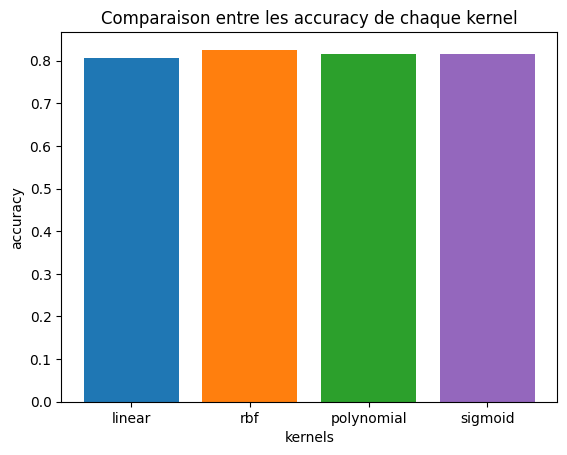

In [ ]:
kernels_list = list(accurcies.keys())
accurcies_list = list(accurcies.values())
# visualisation de la distribution des classes
plt.bar(kernels_list, accurcies_list, align='center', color= ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])
plt.xticks(kernels_list, kernels_list)
plt.xlabel('kernels')
plt.ylabel('accuracy')
plt.title('Comparaison entre les accuracy de chaque kernel')
plt.show()

### L'hyperparamètre C

In [ ]:
accurcies_c = []
C = [0.1,1,10,20,100]
for c in C :
  svm_C = svm_model_with_C(c)
  svm_C.fit(X_train, y_train)
  y_pred = svm_C.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_c.append(accuracy)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print(C[accurcies_c.index(max(accurcies_c))])

100


In [ ]:
accurcies_c.index(max(accurcies_c))

4

In [ ]:
accurcies_c[4]

0.8514331853048042

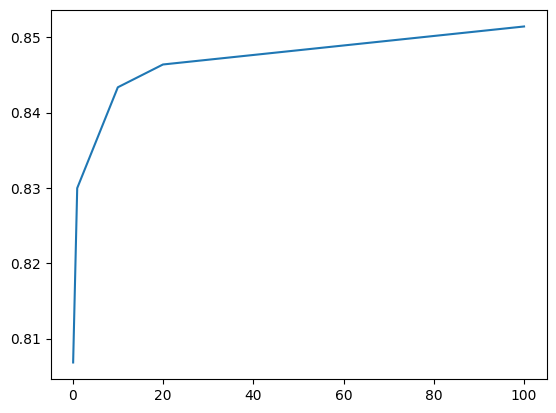

In [ ]:
plt.plot(C, accurcies_c)

On n'a pas pu faire un arrangement de valeurs assez grand car l'entrainement a pris beaucoup de temps, meme pour 10 valeurs de C.

### L'hyperparamètre degree

In [ ]:
accurcies_d = []

In [ ]:
## on commence à partir du degré 2 car degree =1 revient à un kernel linéaire.
## de degré 2 jusqu'à degré 10 inclu

degrees = np.arange(2, 5, 1)
for degree in degrees :
  svm_degree = svm_model_with_degree(degree)
  svm_degree.fit(X_train, y_train)
  y_pred = svm_degree.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_d.append(accuracy)

[LibSVM][LibSVM][LibSVM]

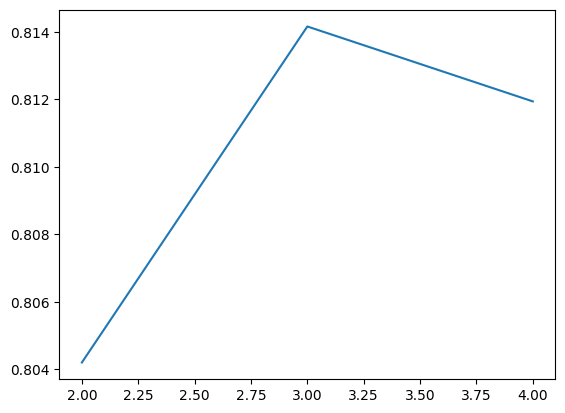

In [ ]:
plt.plot(degrees, accurcies_d)

### L'hyperparamètre gamma

In [ ]:
svm_gamma = svm_model_with_gamma('scale')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8299690485802719

In [ ]:
svm_gamma = svm_model_with_gamma('auto')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8299690485802719

##Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score 
svm = SVC(kernel='rbf', gamma='scale', C = 100, random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.8137078381946945
Recall: 0.911768661735037
F1 score: 0.8599517950019029


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_test, y_pred)
print("Rapport de classification :\n", cr)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      7427
           1       0.81      0.91      0.86      7435

    accuracy                           0.85     14862
   macro avg       0.86      0.85      0.85     14862
weighted avg       0.86      0.85      0.85     14862



[[5875 1552]
 [ 656 6779]]


<ipython-input-45-fa32d76d8e77>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-45-fa32d76d8e77>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


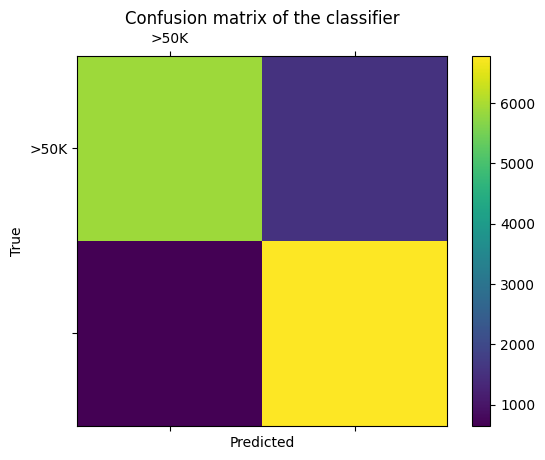

In [ ]:
labels = le.classes_
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Partie 2 - modifiée après le retour du Prof

In [ ]:
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train = pd.read_csv(url_train, delimiter=", ", header=None, index_col=False,
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country', 'income'])
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
test = pd.read_csv(url_test, delimiter=", ", header=None, index_col=False,skiprows=1,
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                           'hours-per-week', 'native-country', 'income'])

data = train.append(test)

<ipython-input-3-0a1a0bfd50f6>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv(url_train, delimiter=", ", header=None, index_col=False,
<ipython-input-3-0a1a0bfd50f6>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(url_test, delimiter=", ", header=None, index_col=False,skiprows=1,
<ipython-input-3-0a1a0bfd50f6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [ ]:
data[data== '?']= np.nan

### Remplissage des champs null

Maintenant, c'est le moment de s'occuper avec les valeurs manquantes, nous rappelons que nous avons les détécter par des valeur **"?"**  et nous les avons transformé en valeurs **nan** pour qu'on puisse les traiter.

Y'en a plusieurs strategies pour traiter ce genre de situation des valeurs null: 


1.   **Suppression des lignes contenant les valeurs null** : Supprimer ces ligne, cependant cette stratégie n'est pas trop admirable surtout si le nombre de ces tuples est considérable par rapport à la taille de dataset et ça peut entraîner une perte d'informations importantes si les valeurs manquantes sont réparties dans plusieurs colonnes ou lignes. 
2.   **Remplir par des statistiques** : Remplaces les valeurs null par des statistiques telles que la moyenne, la médiane ou par la valeur la plus fréquente (mode) "généralement pour les attributs de type numérique on opte par la stratégie de la moyenne mais tout depend". cette stratégie est simple et rapide à mettre en oeuvre mais elle peut générer un bruit sur la dataset que nous voyons un épée à double tranchant pour éviter le surapprentissage.



Vu que les colonnes qui contiennent des valeurs manquantes sont de type **object**, nous utilsons la startegie **Remplir par des statistiques** et on remplit par les valeurs les plus fréquentes.
Scikit-learn dispose des fonctionnalités qui permettent de remplir facilement ces valeurs null dans le module **sklearn.impute** la classe **SimpleImputer**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

on utilise le ColumnTransformer pour appliquer le remplissage directement en correspdance des colonnes.

In [ ]:
workclass_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
occupation_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
native_country_imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('workclass_imputer', workclass_imputer, ['workclass']),
        ('occupation_imputer', occupation_imputer, ['occupation']),
        ('native_country_imputer', native_country_imputer, ['native-country'])

    ])

In [ ]:
data[['workclass', 'occupation', 'native-country']]= ct.fit_transform(data)

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


###Augmentation des données 
Le but est d'équilibrer les classes

In [ ]:
class_counts = data['income'].value_counts()
print(class_counts)

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64


In [ ]:
data['income'].replace(['>50K.'],'>50K', inplace = True)
data['income'].replace(['<=50K.'],'<=50K', inplace = True)

In [ ]:
class_counts = data['income'].value_counts()
print(class_counts)

<=50K    37155
>50K     11687
Name: income, dtype: int64


In [ ]:
# Oversampling la classe minoritaire : '>50K'
class_0_count, class_1_count = data['income'].value_counts()
class_1 = data[data['income'] == '>50K']
class_1_oversampled = class_1.sample(class_0_count, replace=True)

# Concatenatenation de la classe rééchantillée :  '>50K' et la classe dominante'<=50K' afin d'obtenir la dataset balanced. 
data_balanced = pd.concat([data[data['income'] == '<=50K'], class_1_oversampled], axis=0)

# Vérification
class_counts = data_balanced['income'].value_counts()
print(class_counts)

<=50K    37155
>50K     37155
Name: income, dtype: int64


### Encodage des valeurs nominales
**L'encodage** est une technique de conversion des données non numériques qui sont incompréhensible par le modèle en une forme numérique ou binaire. Les données catégorielles peuvent etre divisé en deux catégories **Nominal** (il n'y a pas d'une ordre entre les catégories) , **Ordinal** il y a un ordre logique entre les données. Exemples :    


*   **Ordinal** : petit, moyen, grand.
*   **Nominal** : Rouge, Vert, Bleu .

il existe différents méthodes pour encoder ces données catégorielles en données numériques puis les utiliser pour les algorithmes de Machine Learning, parmi lesquelles nous trouvons :      


*   **OneHot Encoding** : chaque catégorie d'une variable catégorielle est représentée par une colonne binaire distincte dans une matrice. Chaque ligne de la matrice représente un exemple, et une seule colonne aura une valeur de 1, indiquant la catégorie à laquelle appartient l'exemple. par exemple ['red', 'blue', 'gree'] on les représente [1, 0, 0] pour red, [0, 1, 0] pour le blue, [0, 0, 1] pour le vert, ou comme notre cas ['male', 'female']= [[1,0], [0,1]]. Ce type d'encodage est utilisé généralement quand il y'a pas un ordre logique entre les données c'est à dire pour les données nominales. 
*   **Label Encoding** : chaque catégorie d'une variabale catégorielle est représenté par une valeur numérique unique par exemple : ['red', 'blue', 'gree'] = [1, 2, 0]. Ce type d'encodage est utilisé soit l'ordre est important ou pas.
*    **Ordainal encoding** : ici, l'ordre est important, les valeurs de ce type de catégorie est représenté par une valeur numérique, par exemple : ['Bad', 'Good', 'Excellent'] = [0, 1, 2]

Dans notre dataset, les données des caractérisitiques (independent variables) catégorielles n'ont aucun ordre logique entre eux par exemple 'Marital-status' =  {'Married', 'Single', 'Divorced', 'Widowed'}, du coup on opte pour l'encodage **OneHot**. En revanche, pour les classes (dependent vairables) l'attribut 'income', on constate qu'il y a un ordre logique >50K , <=50K donc on encode cette colonne en utilisant le Ordinal encoding. 




On sépare les caractéristiques (features, independent variables) de la target (dependent variables).puis nous faisons le prétraitement nécessaire pour diviser l'ensmble de donées en 2 ensembles, un pour l'entrainement et un pour le test, et puis l'encodage.

In [ ]:
y = data_balanced.iloc [:, -1].values
# y_test = test.iloc [:, -1].values
data_balanced.drop(['income'], axis = 1, inplace = True)
# test.drop(['income'], axis = 1, inplace = True)

In [ ]:
X = data_balanced.iloc[:,:].values

On divise notre dataset, en deux sous ensmble, pour l'entrainement et pour le test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 565)

On applique le OneHot Encoding 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# spécification des colonnes catégorielles à encoder
categorical = [1,3,5,6,7,8,9,13]

# définition du ColumnTransformer
ct = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)], remainder='passthrough')

# application du ColumnTransformer sur les données
data_transformed = ct.fit_transform(X_train)

In [ ]:
data_transformed

array([[0.0, 0.0, 0.0, ..., 7688, 0, 55],
       [0.0, 0.0, 0.0, ..., 0, 0, 35],
       [0.0, 0.0, 0.0, ..., 0, 0, 42],
       ...,
       [0.0, 0.0, 0.0, ..., 99999, 0, 70],
       [0.0, 0.0, 0.0, ..., 0, 0, 44],
       [0.0, 0.0, 0.0, ..., 0, 0, 40]], dtype=object)

In [ ]:
X_train = data_transformed
X_test = ct.transform(X_test)
X_test

array([[0.0, 1.0, 0.0, ..., 0, 0, 35],
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 36],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 40],
       [0.0, 0.0, 0.0, ..., 0, 0, 40]], dtype=object)

In [ ]:
X_train[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 47, 189680, 13, 0, 1977,
       40], dtype=object)

On applique le label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train =  le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
X_test[0]

array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 40, 261497, 9, 0, 0, 35],
      dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Création du modèle

### Kernels

In [ ]:
accurcies = {}

#### Linear kernel

In [ ]:
svm_linear = svm_model_with_kernel('linear')

In [ ]:
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['linear'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['linear'])

Accuracy :  0.8055443412730453


#### rbf kernel

In [ ]:
rbf_svm = svm_model_with_kernel('rbf')
rbf_svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = rbf_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['rbf'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['rbf'])

Accuracy :  0.8281523348136186


#### Polynomial kernel

In [ ]:
poly_svm = svm_model_with_kernel('poly')
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
y_pred = poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['polynomial'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['polynomial'])

Accuracy :  0.8155699098371686


#### Sigmoid Kernel

In [ ]:
sigmoid_svm = svm_model_with_kernel('sigmoid')
sigmoid_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
y_pred = poly_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accurcies['sigmoid'] = accuracy
# Évaluation de la performance
print("Accuracy : ", accurcies['sigmoid'])

Accuracy :  0.8155699098371686


#### Resultats

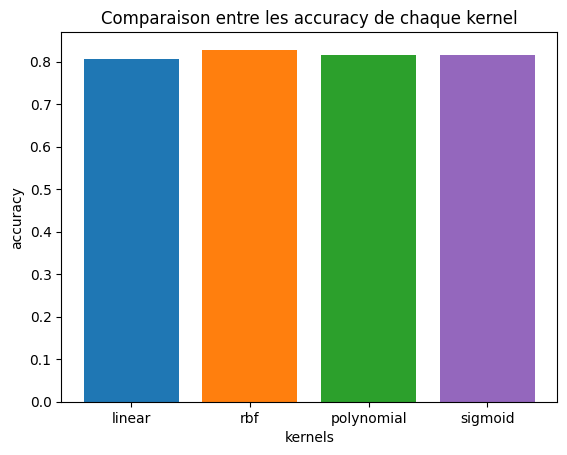

In [ ]:
kernels_list = list(accurcies.keys())
accurcies_list = list(accurcies.values())
# visualisation de la distribution des classes
plt.bar(kernels_list, accurcies_list, align='center', color= ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'])
plt.xticks(kernels_list, kernels_list)
plt.xlabel('kernels')
plt.ylabel('accuracy')
plt.title('Comparaison entre les accuracy de chaque kernel')
plt.show()

### L'hyperparamètre C

In [ ]:
accurcies_c = []
C = [0.1,1,10,20,100]
for c in C :
  svm_C = svm_model_with_C(c)
  svm_C.fit(X_train, y_train)
  y_pred = svm_C.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_c.append(accuracy)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print(C[accurcies_c.index(max(accurcies_c))])

100


In [ ]:
accurcies_c.index(max(accurcies_c))

4

In [ ]:
accurcies_c[4]

0.8534517561566412

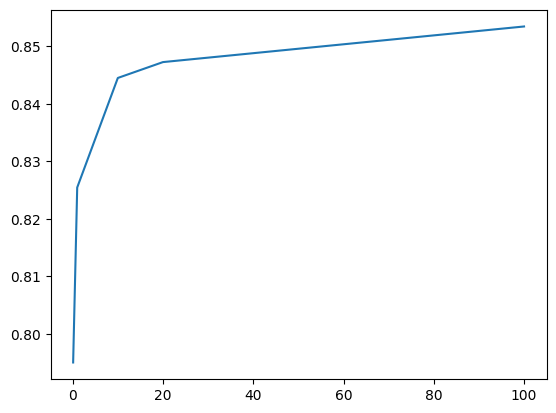

In [ ]:
plt.plot(C, accurcies_c)

On n'a pas pu faire un arrangement de valeurs assez grand car l'entrainement a pris beaucoup de temps, meme pour 10 valeurs de C.

### L'hyperparamètre degree

In [ ]:
accurcies_d = []

In [ ]:
## on commence à partir du degré 2 car degree =1 revient à un kernel linéaire.
## de degré 2 jusqu'à degré 10 inclu

degrees = np.arange(2, 5, 1)
for degree in degrees :
  svm_degree = svm_model_with_degree(degree)
  svm_degree.fit(X_train, y_train)
  y_pred = svm_degree.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_d.append(accuracy)

[LibSVM][LibSVM][LibSVM]

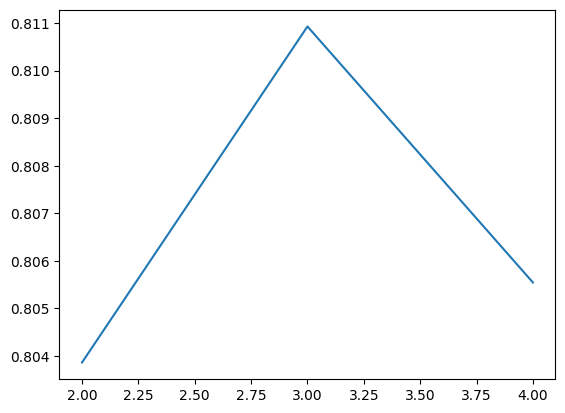

In [ ]:
plt.plot(degrees, accurcies_d)

### L'hyperparamètre gamma

In [ ]:
svm_gamma = svm_model_with_gamma('scale')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8254609070111695

In [ ]:
svm_gamma = svm_model_with_gamma('auto')
svm_gamma.fit(X_train, y_train)
y_pred = svm_gamma.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8318530480419862

In [ ]:
accurcies_g = []

In [ ]:
gammas = np.arange(0.1, 10.1, 0.1)

In [ ]:

for gamma in gammas :
  svm_gamma = svm_model_with_gamma(gamma)
  svm_gamma.fit(X_train, y_train)
  y_pred = svm_gamma.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accurcies_g.append(accuracy)

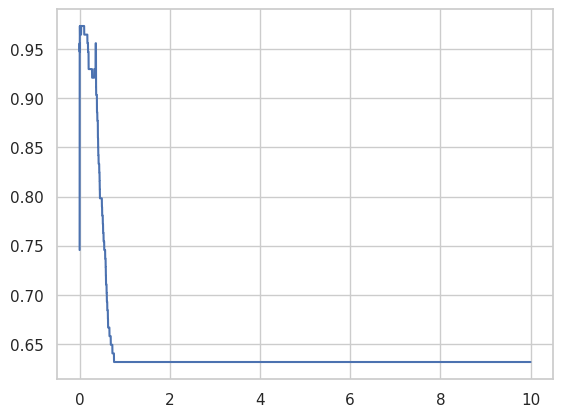

In [ ]:
plt.plot(gammas, accurcies_g)

##Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score 
svm = SVC(kernel='rbf', gamma='scale', C = 100, random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.8176940503159652
Recall: 0.9223940820443847
F1 score: 0.8668941979522184


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8582963262010497

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_test, y_pred)
print("Rapport de classification :\n", cr)

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      7427
           1       0.82      0.92      0.87      7435

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862



[[5898 1529]
 [ 577 6858]]


<ipython-input-22-fa32d76d8e77>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-22-fa32d76d8e77>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


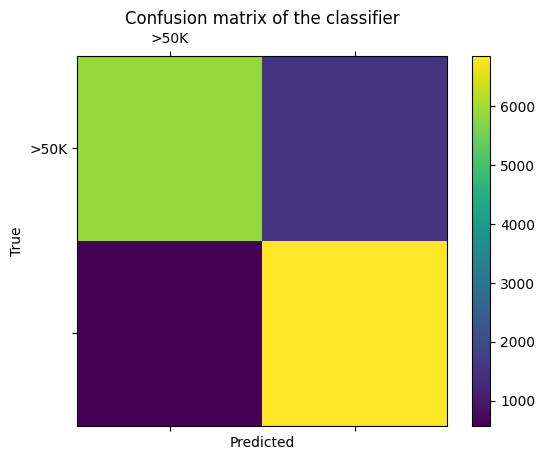

In [ ]:
labels = le.classes_
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()